In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
housing = pd.DataFrame(pd.read_csv('Housing.csv'))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [92]:
m = len(housing)
m

545

In [93]:
housing.shape

(545, 13)

In [94]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

#We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape, df_test.shape

((436, 13), (109, 13))

In [95]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,parking,price
542,3620,2,1,1,0,1750000
496,4000,2,1,1,0,2695000
484,3040,2,1,1,0,2870000
507,3600,2,1,1,0,2590000
252,9860,3,1,1,0,4515000


In [96]:
df_Newtrain.shape, df_Newtest.shape

((436, 6), (109, 6))

In [97]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
m_scaler = MinMaxScaler()
s_scaler = StandardScaler()
#MinMax First
df_Newtrain[num_vars] = s_scaler.fit_transform(df_Newtrain[num_vars])
df_Newtest[num_vars] = s_scaler.fit_transform(df_Newtest[num_vars])
df_Newtrain.head(10), df_Newtest.head(10)

(         area  bedrooms  bathrooms   stories   parking     price
 542 -0.716772 -1.294376  -0.573307 -0.933142 -0.819149 -1.586001
 496 -0.538936 -1.294376  -0.573307 -0.933142 -0.819149 -1.090971
 484 -0.988206 -1.294376  -0.573307 -0.933142 -0.819149 -0.999299
 507 -0.726132 -1.294376  -0.573307 -0.933142 -0.819149 -1.145974
 252  2.203478  0.052516  -0.573307 -0.933142 -0.819149 -0.137579
 263 -0.553912  0.052516  -0.573307  0.212914 -0.819149 -0.192583
 240 -0.613815  0.052516  -0.573307  0.212914  0.325559 -0.100910
 175  2.175399  1.399408   1.475561  0.212914  1.470267  0.247444
 385 -0.707412 -1.294376  -0.573307 -0.933142 -0.819149 -0.632610
 374 -0.763571 -1.294376   1.475561 -0.933142 -0.819149 -0.595941,
          area  bedrooms  bathrooms   stories   parking     price
 239 -0.500735  0.025607  -0.563545  0.272416  0.492144 -0.081358
 113  1.954229  0.025607  -0.563545 -0.915317  1.739673  0.801114
 325 -0.736621  1.421209  -0.563545  0.272416 -0.755384 -0.421563
 66   3.5

In [98]:
Y_Normtrain = df_Newtrain.pop('price')
X_Normtrain = df_Newtrain.copy()
Y_Normtest = df_Newtest.pop('price')
X_Normtest = df_Newtest.copy()

In [99]:
X_Normtrain.head()

,area,bedrooms,bathrooms,stories,parking
542,-0.716772,-1.294376,-0.573307,-0.933142,-0.819149
496,-0.538936,-1.294376,-0.573307,-0.933142,-0.819149
484,-0.988206,-1.294376,-0.573307,-0.933142,-0.819149
507,-0.726132,-1.294376,-0.573307,-0.933142,-0.819149
252,2.203478,0.052516,-0.573307,-0.933142,-0.819149


In [100]:
Y_Normtrain.head()

542   -1.586001
496   -1.090971
484   -0.999299
507   -1.145974
252   -0.137579
Name: price, dtype: float64

In [101]:
#Scaling on the outputs
#Y = Y_Normtrain.values
#Y_test = Y_Normtest.values

#No scaling on the outputs
Y = df_train['price']
Y_test = df_test['price']
Y

542    1750000
496    2695000
484    2870000
507    2590000
252    4515000
        ...   
70     6790000
277    4305000
9      9800000
359    3710000
192    5040000
Name: price, Length: 436, dtype: int64

In [102]:
X1 = df_Newtrain.values[:, 0] #Area values
X2 = df_Newtrain.values[:, 1] #Bedroom values
X3 = df_Newtrain.values[:, 2] #Bathroom values
X4 = df_Newtrain.values[:, 3] #Stories values
X5 = df_Newtrain.values[:, 4] #Parking values

X1_test = df_Newtest.values[:, 0] #Area values
X2_test = df_Newtest.values[:, 1] #Bedroom values
X3_test = df_Newtest.values[:, 2] #Bathroom values
X4_test = df_Newtest.values[:, 3] #Stories values
X5_test = df_Newtest.values[:, 4] #Parking values

In [103]:
m_train = len(Y_Normtrain)
m_test = len(Y_Normtest)
m_train, m_test

(436, 109)

In [104]:
X_0 = np.ones((m_train, 1))
X_0_test = np.ones((m_test, 1))

In [105]:
#Reshape function used to convert X from 1D to 2D array of m x 1
X_1 = X1.reshape(m_train, 1)
X_2 = X2.reshape(m_train, 1)
X_3 = X3.reshape(m_train, 1)
X_4 = X4.reshape(m_train, 1)
X_5 = X5.reshape(m_train, 1)

X_1_test = X1_test.reshape(m_test, 1)
X_2_test = X2_test.reshape(m_test, 1)
X_3_test = X3_test.reshape(m_test, 1)
X_4_test = X4_test.reshape(m_test, 1)
X_5_test = X5_test.reshape(m_test, 1)


In [106]:
#hstack() function from numpy to have X_0 to X_5 in one final Matrix
X = np.hstack((X_0, X_1, X_2, X_3, X_4, X_5))
X_test = np.hstack((X_0_test, X_1_test, X_2_test, X_3_test, X_4_test, X_5_test))


In [114]:
theta = np.zeros(6)

lambda_val = 10
lambda_val

10

In [115]:
def compute_cost(X, Y, theta, Lambda):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    pen_parameter = np.square(theta)
    penalty = Lambda * np.sum(pen_parameter)
    J = 1 / (2 *m) * (np.sum(sqrErrors) + penalty)
    
    return J

In [116]:
cost = compute_cost(X, Y, theta, lambda_val)
print('The cost for given values of theta_0, theta_1, theta_2, theta_3, theta_4, theta_5 =', cost)

The cost for given values of theta_0, theta_1, theta_2, theta_3, theta_4, theta_5 = 10587991986906.973


In [117]:
def gradient_descent(X, Y, theta, alpha, iterations, Lambda):
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, Y)
        pen_parameter = np.square(errors)
        penalty = np.multiply((Lambda/m), theta)
        sum_delta = (alpha / m) * (X.transpose().dot(errors) + penalty) 
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, Y, theta, Lambda)
        
    return theta, cost_history

In [118]:
theta = [0., 0., 0., 0., 0., 0.]
theta_test = [0., 0., 0., 0., 0., 0.]
iterations = 4000;
alpha = 0.005;

In [119]:
theta, cost_history = gradient_descent(X, Y, theta, alpha, iterations, lambda_val)
theta_test, cost_history_test = gradient_descent(X_test, Y_test, theta_test, alpha, iterations, lambda_val)
print('Final value of theta =', theta)
print('cost_history =', cost_history)
print('Final value of theta test set =', theta_test)
print('cost_history test set =', cost_history_test)

Final value of theta = [4777433.60964876  741567.54975841  170057.19476091  580603.81648472
  458960.00450967  305644.53639474]
cost_history = [1.05035017e+13 1.04197737e+13 1.03368006e+13 ... 8.70988936e+11
 8.70988937e+11 8.70988938e+11]
Final value of theta test set = [4636049.52228922  606239.70352118  -42307.61988858  554232.19304491
  514820.74598871  398170.26887061]
cost_history test set = [2.51381730e+12 2.50872205e+12 2.50363858e+12 ... 3.14806310e+11
 3.14812268e+11 3.14818222e+11]


Text(0.5, 1.0, 'Convergence of gradient descent')

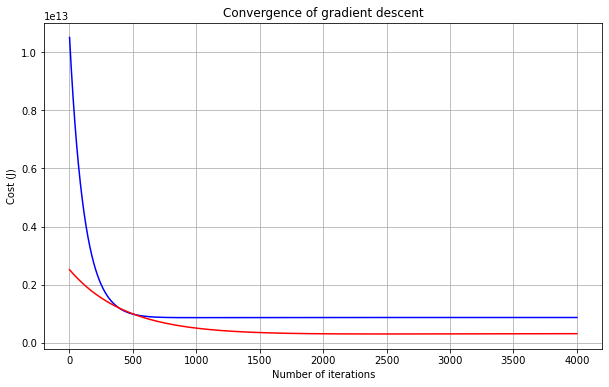

In [120]:
plt.plot(range(1, iterations + 1), cost_history, color = 'blue')
plt.plot(range(1, iterations + 1), cost_history_test, color = 'red')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')